#Introduction to TensorFlow

What You'll Learn in This Tutorial:

*   Installation & Setup – Installing TensorFlow and setting up the environment.
*   Tensors & Operations – Understanding the fundamental data structure of TensorFlow.
*    Building Neural Networks – Creating simple models using the Sequential API and tf.keras.
*    Training & Evaluation – Using optimizers, loss functions, and metrics.
*    Saving & Loading Models – Persisting trained models for future use (For next lab)


Links and resources:

1. Tensorflow documentation: https://www.tensorflow.org/api_docs
2. Keras documentation: https://keras.io/api/
3. Tensorflow GPU installation with CUDNN: https://www.youtube.com/watch?v=QUjtDIalh0k
4. Tensorflow for beginers: https://www.tensorflow.org/tutorials/quickstart/beginner

Note: Number 3 is just an example video. Installing CUDA on your PC depends on your specific system configuration. You must ensure that your GPU version matches the correct CUDA Toolkit and TensorFlow version for compatibility.

# Tensors & Operations

What is a Tensor?

A tensor is a multi-dimensional array, similar to a NumPy array, but designed for high-performance numerical computing. Tensors are the core data structure in TensorFlow and are optimized for GPU acceleration and automatic differentiation in deep learning models.


1️⃣ Import TensorFlow

In [ ]:
import tensorflow as tf

2️⃣ Creating Tensors

In [ ]:
# Scalar (Rank 0 Tensor)
scalar = tf.constant(7) #value
print(scalar)

# Vector (Rank 1 Tensor)
vector = tf.constant([10, 20, 30])
print(vector)

# Matrix (Rank 2 Tensor)
matrix = tf.constant([[1, 2], [3, 4]])
print(matrix)

# 3D Tensor (Rank 3)
tensor_3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(tensor_3d)

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor([10 20 30], shape=(3,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32)


3️⃣ Tensor Operations

In [ ]:
# Addition
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])
sum_tensor = tf.add(a, b)
print(sum_tensor)

# Multiplication
mul_tensor = tf.multiply(a, b)
print(mul_tensor)

# Matrix Multiplication (Dot Product)
mat1 = tf.constant([[1, 2], [3, 4]])
mat2 = tf.constant([[5, 6], [7, 8]])
mat_mul = tf.matmul(mat1, mat2)
print(mat_mul)

tf.Tensor([5 7 9], shape=(3,), dtype=int32)
tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


4️⃣ Tensor Shape & Data Type

In [ ]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Shape:", tensor.shape)
print("Datatype:", tensor.dtype)

Shape: (2, 3)
Datatype: <dtype: 'int32'>


# Building Neural Networks with a Sequential Model

**Step 1: Dataset creation** (Preprocess with Harris Corner Detection)

We will use OpenCV to apply Harris corner detection, and then use the output as an input to the CNN model.

Your X_train and y_train for training the model, you need to follow these steps:

1. Prepare your dataset: Collect a set of images that contain different scenes or objects.

2. Apply Harris Corner Detection: For each image in your dataset, apply Harris corner detection to identify the corners. This will be your X_train, as each image will be transformed into a corner-detected version.

3. Label the images: Label each image as either containing corners or not, or you could annotate the specific corner locations if you want to work with more specific corner detection. For a binary classification, you could label the images as:
  - 1 if the image contains corners
  - 0 if the image does not contain corners (or is a non-corner region)

 These labels will be your y_train.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [ ]:
def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)
    corners = np.zeros_like(image)
    corners[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
    return corners

Dataset Creation


In [ ]:
# Prepare X_train by applying Harris Corner Detection to a directory of images
X_train = []
y_train = []

image_list = [f'image({i}).jpg' for i in range(1, 6)]

for image_name in image_list:
    if image_name.endswith('.jpg') or image_name.endswith('.png'):  # Filter image files
        image = cv2.imread(image_name)

        # Apply Harris corner detection
        corner_image = harris_corner_detection(image)

        # Add the corner image to X_train
        X_train.append(corner_image)

        # Label the image as 1 for corner detection (since Harris will always detect corners)
        # You can adjust the logic to create more complex labels
        y_train.append(1)  # For simplicity, labeling as 1 (corner detected)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (5, 256, 256, 3)
y_train shape: (5,)


**CNN**

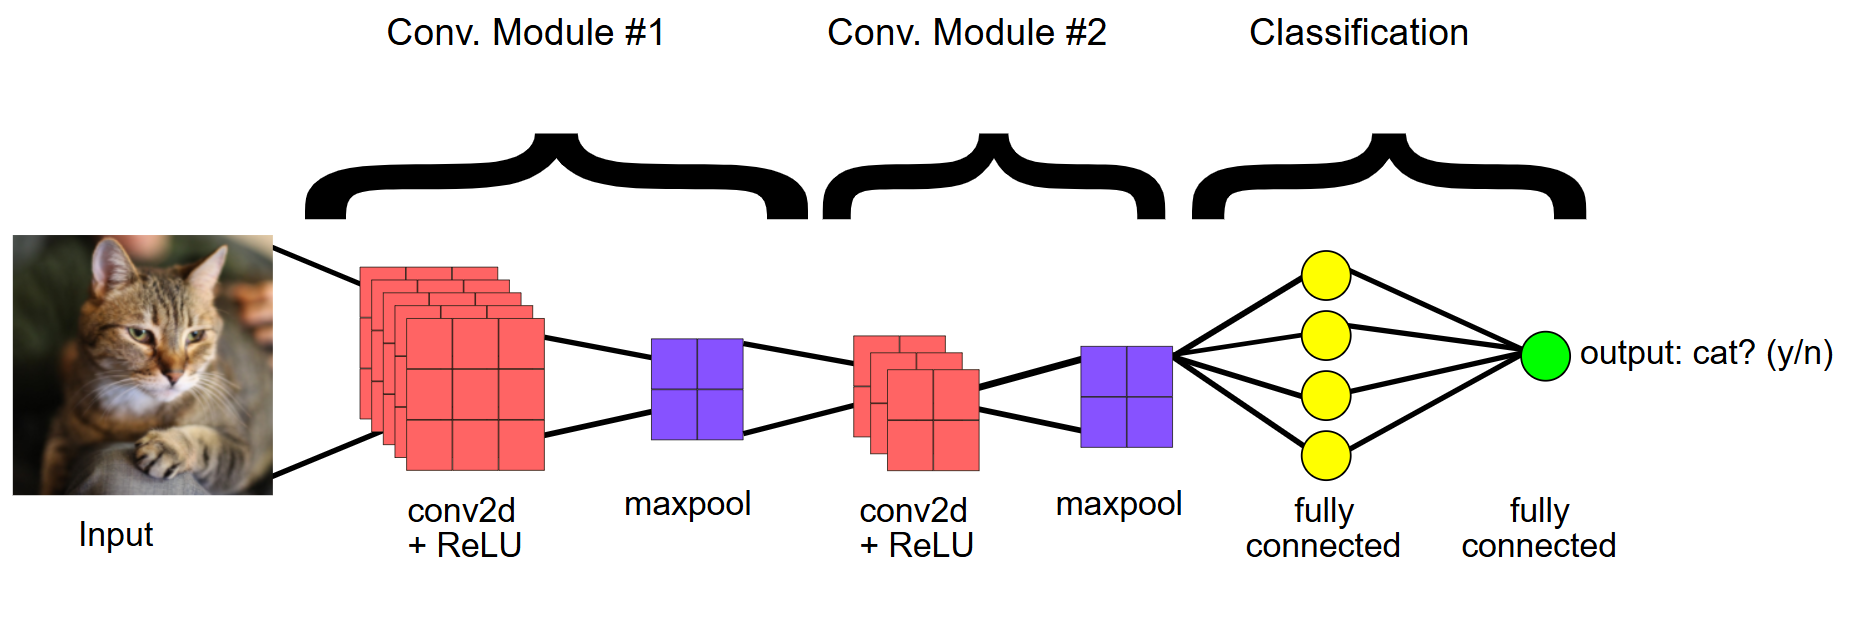

**Step 2: Define a Sequential CNN Model**

After detecting corners using the Harris method, you can pass this output into a CNN for further classification, detection, or refinement.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def build_cnn_model(input_shape=(256, 256, 3)):

    model = Sequential()

    # Extracts low-level features (e.g., edges) with 32 filters
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # Reduces spatial dimensions to focus on significant features
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Learns mid-level features (e.g., textures) with 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Learns high-level features (e.g., object parts) with 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Prepares extracted features for classification
    model.add(Flatten())

    # Combines learned features through a dense layer with 128 neurons
    model.add(Dense(128, activation='relu'))

    # Outputs a single probability for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Configures the model for training
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define the model
model = build_cnn_model()

# Show summary of the model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

**Step 3: Training the Model**

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7500 - loss: 1.5160 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00

**Step 4: Testing and Evaluation**

In [ ]:
new_image = cv2.imread('test.jpg')
corner_image = harris_corner_detection(new_image)  # Apply Harris Corner detection
corner_image_resized = cv2.resize(corner_image, (256, 256))  # Resize to the correct input size
corner_image_normalized = corner_image_resized / 255.0  # Normalize pixel values

# Reshape for a batch (the model expects a batch of images)
new_image_batch = np.expand_dims(corner_image_normalized, axis=0)

# Predict on the new image
prediction = model.predict(new_image_batch)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction: [[1.]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


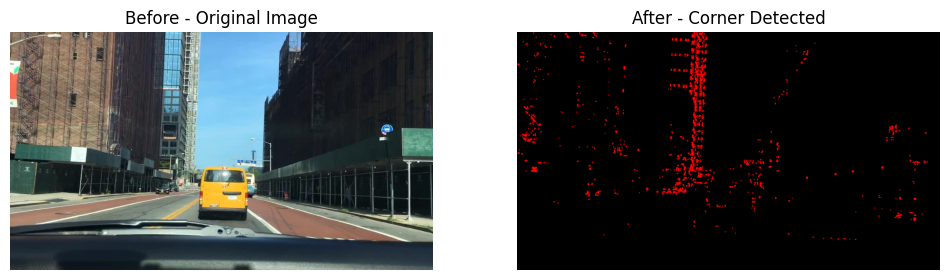

Prediction value: [1.]


In [ ]:
# Load and preprocess the test image
test_image_path = 'test.jpg'
test_image = cv2.imread(test_image_path)

# Apply Harris Corner Detection
corner_image = harris_corner_detection(test_image)

# Resize and normalize the image (resize to the same size as input to your model)
corner_image_resized = cv2.resize(corner_image, (256, 256))  # Ensure the same size as model input
corner_image_normalized = corner_image_resized / 255.0  # Normalize pixel values

# Reshape the image to match the model input (batch size of 1)
test_image_batch = np.expand_dims(corner_image_normalized, axis=0)

# Get the prediction from the model
prediction = model.predict(test_image_batch)

# Convert prediction to class label (assuming binary classification)
prediction_label = 'Corner Detected' if prediction[0] > 0.5 else 'No Corner Detected'

# Display the before and after images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# "Before" image (Original)
axes[0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axes[0].set_title("Before - Original Image")
axes[0].axis('off')  # Hide axes

# "After" image (With Corner Detection)
axes[1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
axes[1].set_title(f"After - {prediction_label}")
axes[1].axis('off')  # Hide axes

# Show the plot
plt.show()

# Optionally, display prediction value
print(f"Prediction value: {prediction[0]}")

# Saving & Loading Models

In [ ]:
model.save("my_model.keras")

In [ ]:
loaded_model = tf.keras.models.load_model("my_model.keras")